In [1]:
import wfdb
import numpy as np
import pandas as pd 
from acceleration_path import AccPath

In [2]:
'''
    SELECT WHICH ONE TO PROCESS
    COMMENT OUT ELSE
'''

file_index = "t+90s_for_30s"
t_0 = 9000
t_n = t_0+3000

# file_index = "t+0_for_1h"
# t_0 = 0
# t_n = t_0+360000

# file_index = "t+0_for_12h"
# t_0 = 0
# t_n = t_0+4320000

# file_index = "t+12h_for_12h"
# t_0 = 4320000
# t_n = t_0+4320000

# file_index = "t+24h_for_12h"
# t_0 = 8640000
# t_n = t_0+4320000

# file_index = "t+14h_for_5min" 
# t_0 = 5000000
# t_n = t_0+30000

# file_index = "t+14h_for_10min" 
# t_0 = 5000000
# t_n = t_0+60000

# file_index = "complete"

# set to True, to create new csv file
create_new_CSV = False

In [3]:
# create CSV file
'''
short_walk.csv - Data Format:
    Time (s),Gyroscope X (deg/s),Gyroscope Y (deg/s),Gyroscope Z (deg/s),Accelerometer X (g),Accelerometer Y (g),Accelerometer Z (g)

wfdb - Data Format:
    {'fs': 100,
    'sig_len': 3000,
    'n_sig': 6,
    'base_date': None,
    'base_time': None,
    'units': ['g', 'g', 'g', 'degrees/s', 'degrees/s', 'degrees/s'],
    'sig_name': ['v-acceleration',
    'ml-acceleration',
    'ap-acceleration',
    'yaw-velocity',
    'pitch-velocity',
    'roll-velocity'],
    'comments': ['Age:75.17', 'Sex:F']}
'''

if create_new_CSV:
    # needs CO001.dat file in the data directory
    signals, _ = wfdb.rdsamp('data/CO001', sampfrom=t_0, sampto=t_n)
    time = np.array(range(len(signals)))/100

    d = {
        'Time (s)':time,
        'Gyroscope X (deg/s)': -signals[:,3], 
        'Gyroscope Y (deg/s)': signals[:,4], 
        'Gyroscope Z (deg/s)': -signals[:,5], 
        'Accelerometer X (g)': -signals[:,0], 
        'Accelerometer Y (g)': signals[:,1], 
        'Accelerometer Z (g)': -signals[:,2]
        }
    df = pd.DataFrame(data=d)
    df.to_csv("data/CO001_" + file_index + ".csv", index = False)

In [4]:
data = np.genfromtxt("data/CO001_" + file_index + ".csv", delimiter=",", skip_header=1)

acc_path = AccPath(
    gyroscope=data[:, 1:4], 
    accelerometer=data[:, 4:7], 
    timestamp=data[:, 0],
    sample_rate=100, 
    saving_path="media/"+file_index+"/")

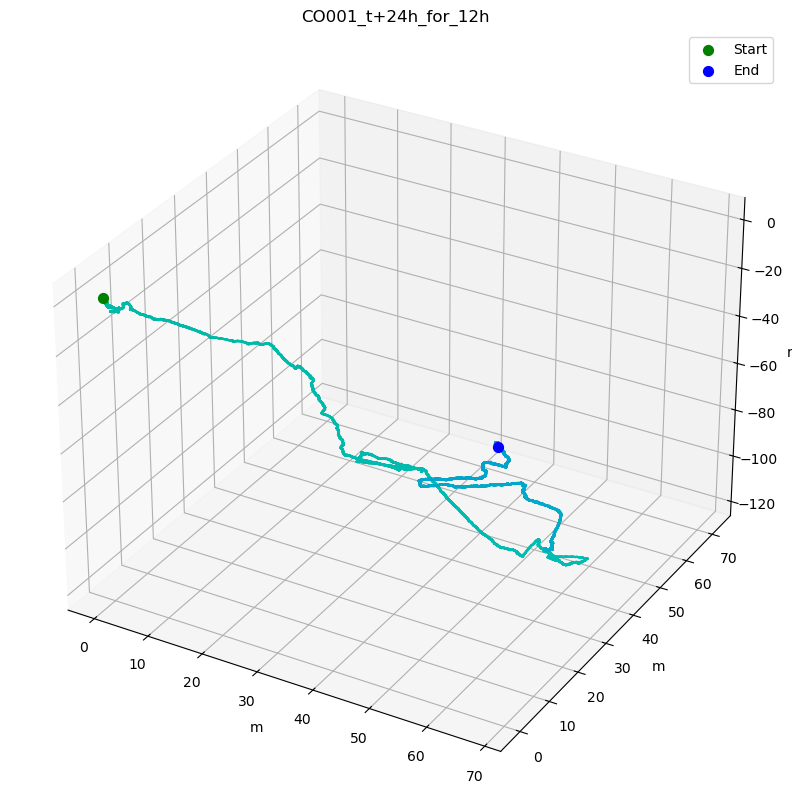

In [5]:
acc_path.plot_path(title="CO001_" + file_index)

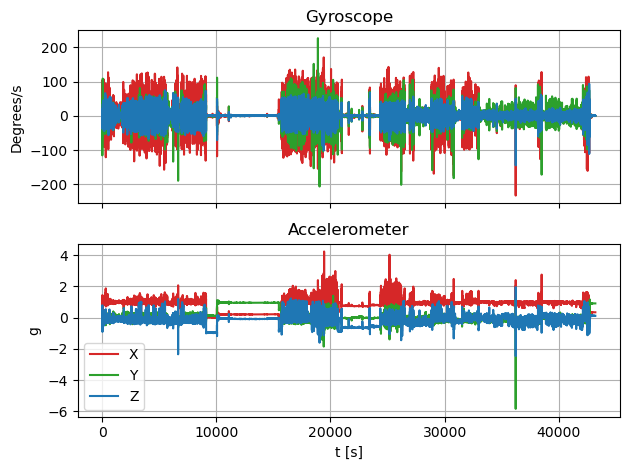

In [6]:
acc_path.plot_sensor_data()

c:\Users\ugurt\Nextcloud\UniBa\ethics\eps\acceleration_path.py:86: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(self.path+"euler_angles.png")
c:\Users\ugurt\anaconda3\envs\eps\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


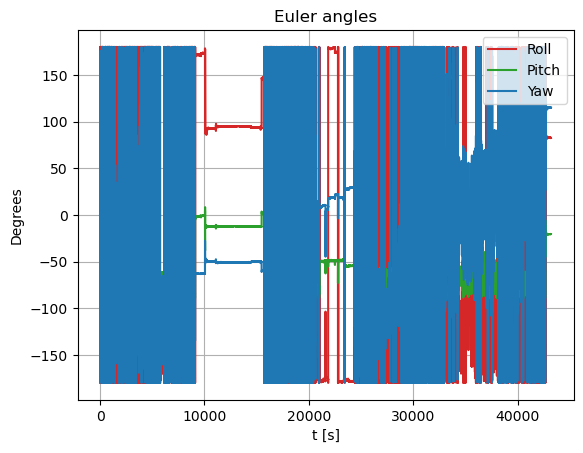

In [7]:
acc_path.plot_euler_angles()

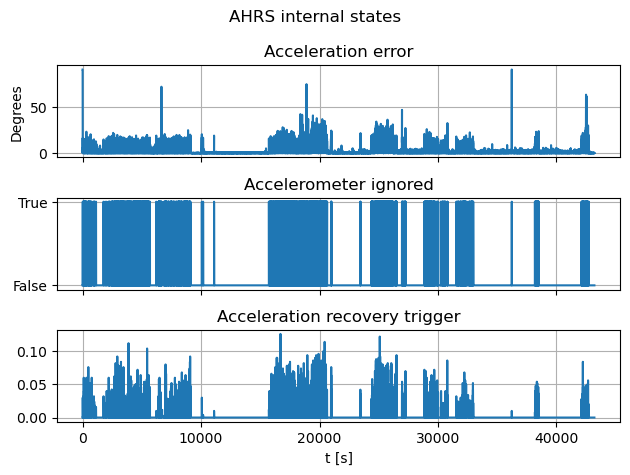

In [8]:
acc_path.plot_internal_states()

c:\Users\ugurt\Nextcloud\UniBa\ethics\eps\acceleration_path.py:143: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\ugurt\Nextcloud\UniBa\ethics\eps\acceleration_path.py:144: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(self.path+"acceleration_velocity_position.png")
c:\Users\ugurt\anaconda3\envs\eps\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


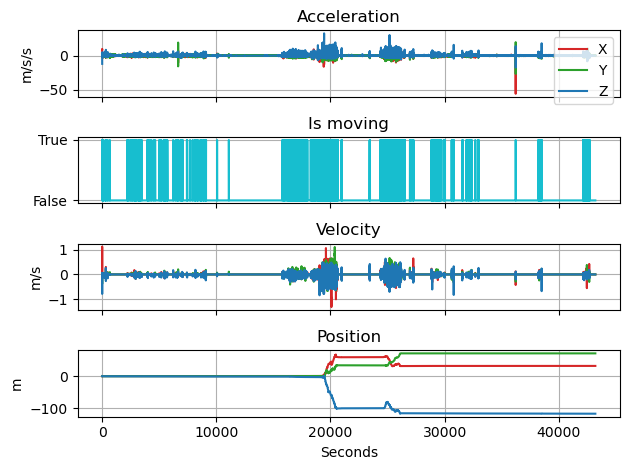

In [9]:
acc_path.plot_acceleration_velocity_position()

In [10]:
acc_path.print_distance_start_final()

Start-Final-Distance: 141.473 m


In [11]:
'''
    ANIMATION DOES NOT WORK YET FOR RANGE > 30 SECONDS. 
'''
# acc_path.create_path_animation()

'\n    ANIMATION DOES NOT WORK YET FOR RANGE > 30 SECONDS. \n'